In [1]:
print("Here begins the data overview notebook.")

Here begins the data overview notebook.


In [2]:
# Mental Health in Tech Survey – Data Overview & Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load dataset, set display options, show first few rows
pd.set_option("display.max_columns", None)

df = pd.read_csv("../data/raw/mental_health_tech.csv")

df.head()

,index,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [2]:
#Print information about the dataset
print("Shape:", df.shape)
print("\nColumn types:")
print(df.dtypes)

Shape: (1259, 28)

Column types:
index                        int64
Timestamp                      str
Age                          int64
Gender                         str
Country                        str
state                          str
self_employed                  str
family_history                 str
treatment                      str
work_interfere                 str
no_employees                   str
remote_work                    str
tech_company                   str
benefits                       str
care_options                   str
wellness_program               str
seek_help                      str
anonymity                      str
leave                          str
mental_health_consequence      str
phys_health_consequence        str
coworkers                      str
supervisor                     str
mental_health_interview        str
phys_health_interview          str
mental_vs_physical             str
obs_consequence                str
comments              

In [3]:
#Print summary statistics
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,1259.0,NaN,NaN,NaN,629.0,363.586303,0.0,314.5,629.0,943.5,1258.0
Timestamp,1259,1246,2014-08-27 12:31:41,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1259.0,NaN,NaN,NaN,79428148.311358,2818299442.981968,-1726.0,27.0,31.0,36.0,99999999999.0
Gender,1259,49,Male,615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,1259,48,United States,751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,744,45,CA,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
self_employed,1241,2,No,1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
family_history,1259,2,No,767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
treatment,1259,2,Yes,637,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_interfere,995,4,Sometimes,465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Data Cleaning, convert invalid ages to missing values
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")

df.loc[(df["Age"] < 15) | (df["Age"] > 100), "Age"] = np.nan
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,1259.0,NaN,NaN,NaN,629.0,363.586303,0.0,314.5,629.0,943.5,1258.0
Timestamp,1259,1246,2014-08-27 12:31:41,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1251.0,NaN,NaN,NaN,32.076739,7.288272,18.0,27.0,31.0,36.0,72.0
Gender,1259,49,Male,615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,1259,48,United States,751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,744,45,CA,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
self_employed,1241,2,No,1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
family_history,1259,2,No,767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
treatment,1259,2,Yes,637,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_interfere,995,4,Sometimes,465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Variable semantics, save summary to CSV
variable_summary = pd.DataFrame({
    "variable": df.columns,
    "dtype": df.dtypes.astype(str),
    "missing_pct": df.isna().mean() * 100,
    "unique_values": df.nunique()
})

variable_summary.sort_values("missing_pct", ascending=False)
variable_summary.to_csv("../outputs/tables/mental_health_tech_variable_summary.csv", index=False)

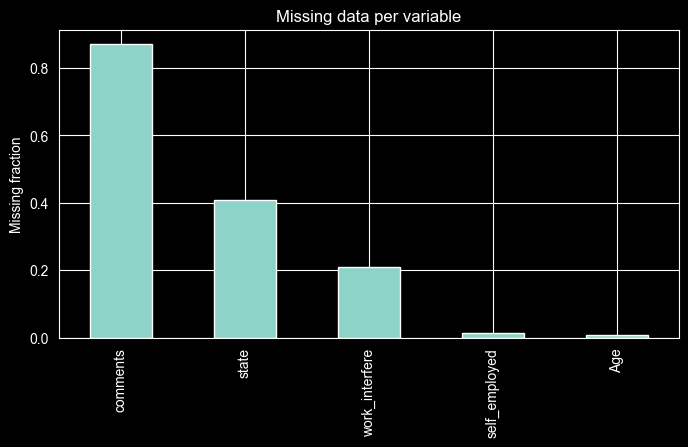

In [6]:
# Missing data analysis
missing = df.isna().mean().sort_values(ascending=False)

plt.figure(figsize=(8,4))
missing[missing > 0].plot(kind="bar")
plt.ylabel("Missing fraction")
plt.title("Missing data per variable")
plt.show()


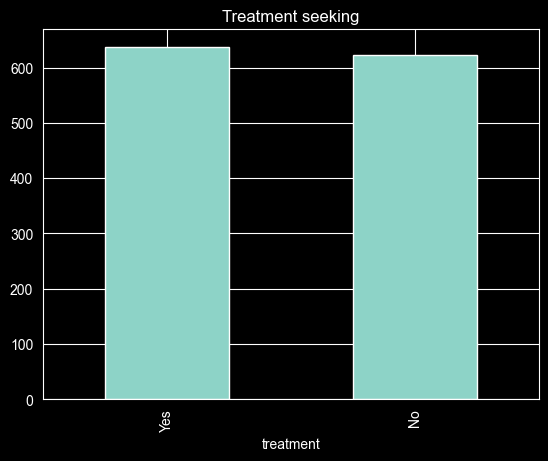

In [7]:
# Exploratory Plots
df["treatment"].value_counts().plot(kind="bar")
plt.title("Treatment seeking")
plt.show()


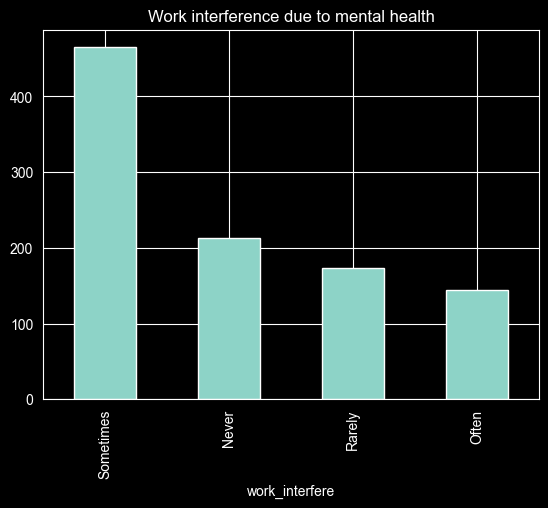

In [9]:
df["work_interfere"].value_counts().plot(kind="bar")
plt.title("Work interference due to mental health")
plt.show()


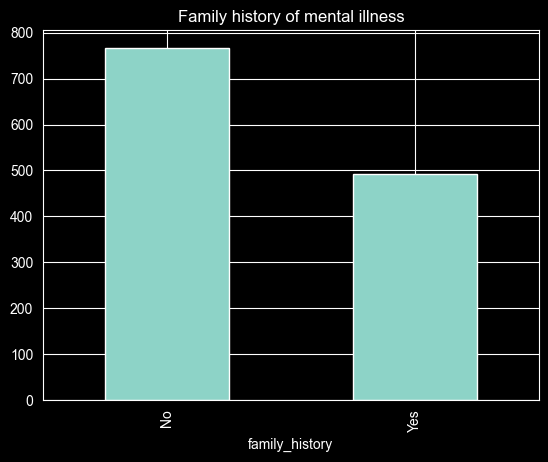

In [10]:
df["family_history"].value_counts().plot(kind="bar")
plt.title("Family history of mental illness")
plt.show()


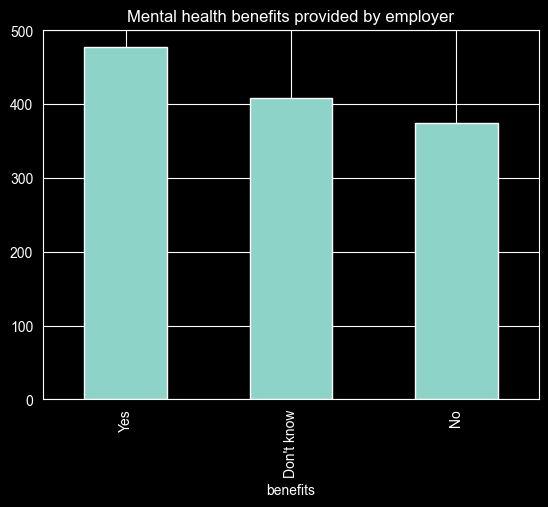

In [18]:
df["benefits"].value_counts().plot(kind="bar")
plt.title("Mental health benefits provided by employer")
plt.show()


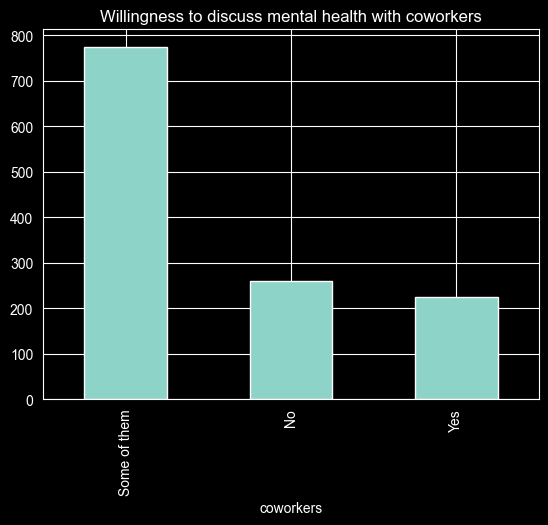

In [14]:
df["coworkers"].value_counts().plot(kind="bar")
plt.title("Willingness to discuss mental health with coworkers")
plt.show()


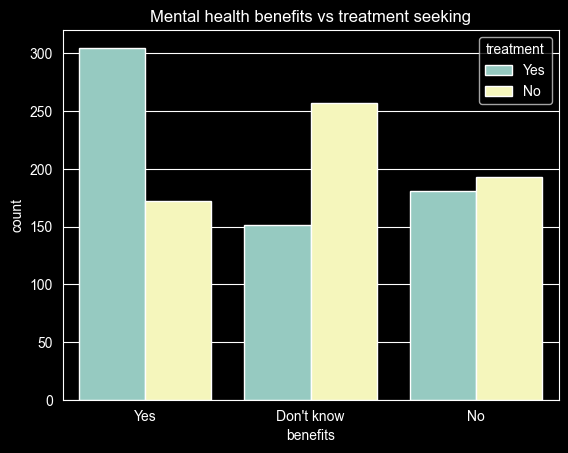

In [19]:
# Relationship with outcome
sns.countplot(x="benefits", hue="treatment", data=df)
plt.title("Mental health benefits vs treatment seeking")
plt.show()


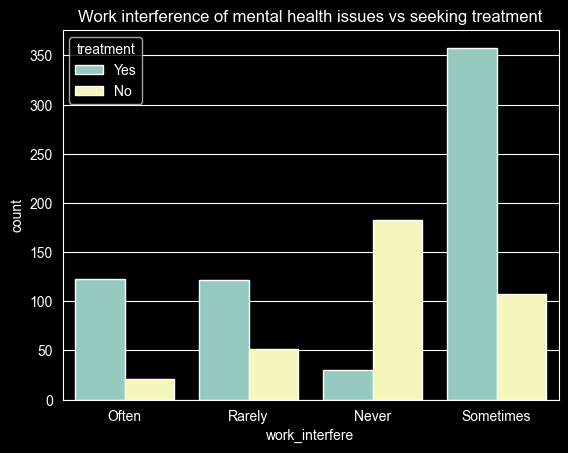

In [20]:
sns.countplot(x="work_interfere", hue="treatment", data=df)
plt.title("Work interference of mental health issues vs seeking treatment")
plt.show()


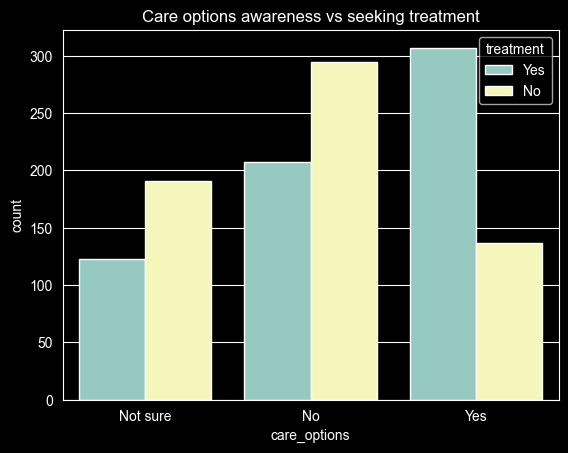

In [21]:
sns.countplot(x="care_options", hue="treatment", data=df)
plt.title("Care options awareness vs seeking treatment")
plt.show()


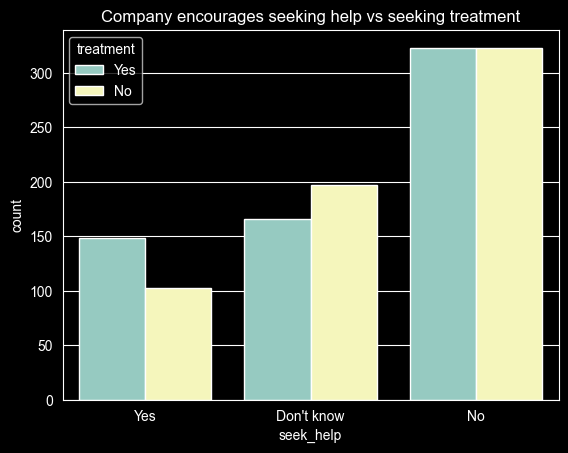

In [22]:
sns.countplot(x="seek_help", hue="treatment", data=df)
plt.title("Company encourages seeking help vs seeking treatment")
plt.show()


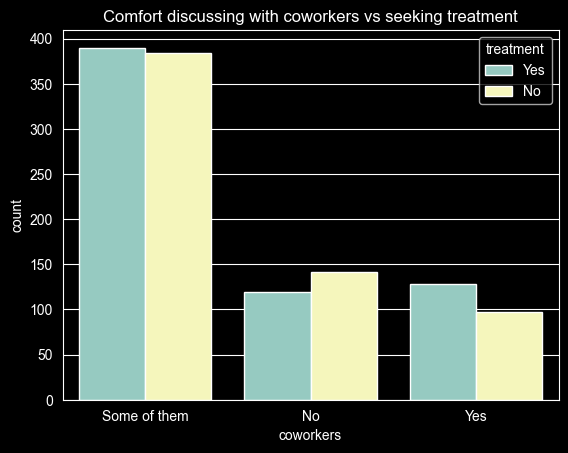

In [23]:
sns.countplot(x="coworkers", hue="treatment", data=df)
plt.title("Comfort discussing with coworkers vs seeking treatment")
plt.show()


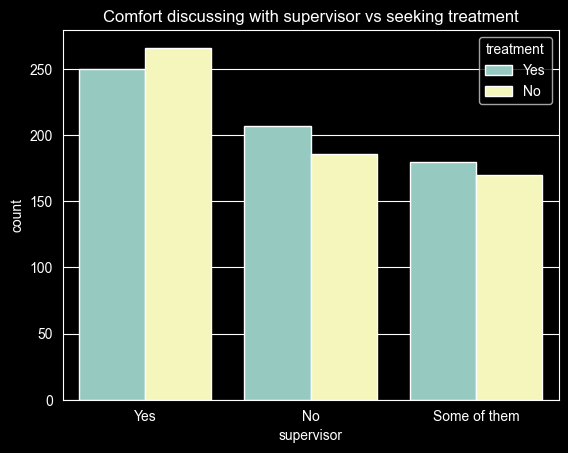

In [24]:
sns.countplot(x="supervisor", hue="treatment", data=df)
plt.title("Comfort discussing with supervisor vs seeking treatment")
plt.show()


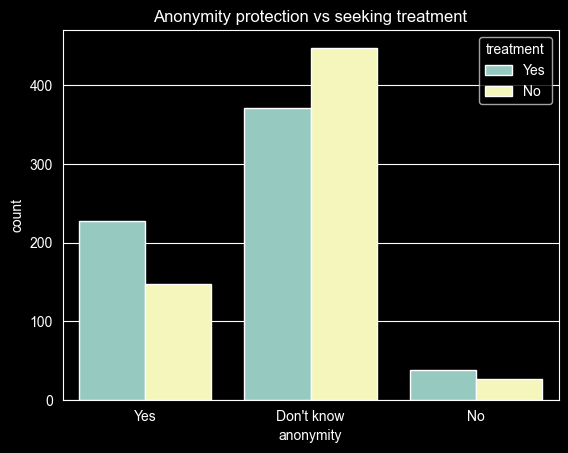

In [25]:
sns.countplot(x="anonymity", hue="treatment", data=df)
plt.title("Anonymity protection vs seeking treatment")
plt.show()


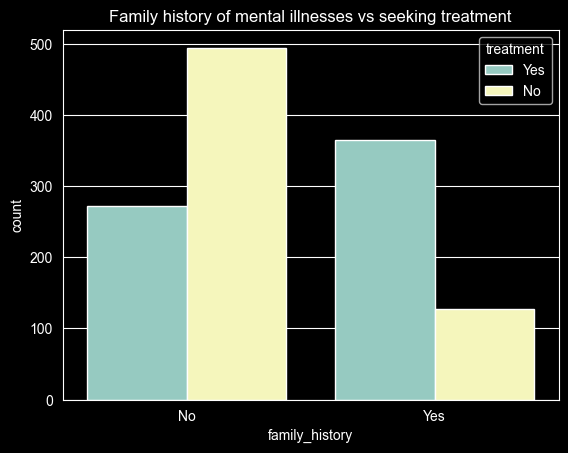

In [26]:
sns.countplot(x="family_history", hue="treatment", data=df)
plt.title("Family history of mental illnesses vs seeking treatment")
plt.show()


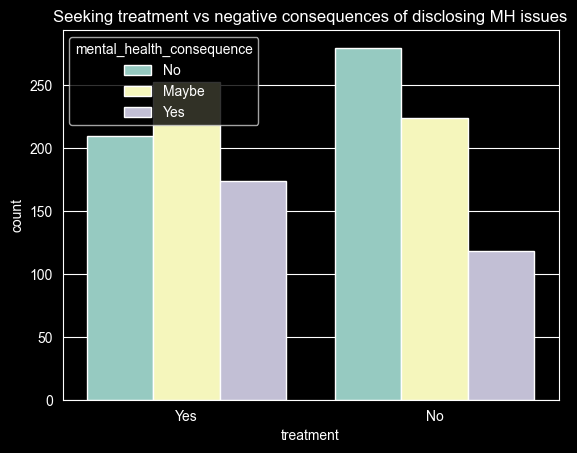

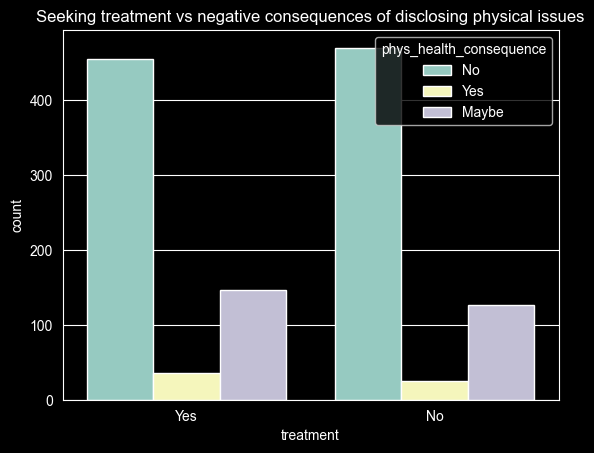

In [27]:
sns.countplot(x="treatment", hue="mental_health_consequence", data=df)
plt.title("Seeking treatment vs negative consequences of disclosing MH issues")
plt.show()

sns.countplot(x="treatment", hue="phys_health_consequence", data=df)
plt.title("Seeking treatment vs negative consequences of disclosing physical issues")
plt.show()

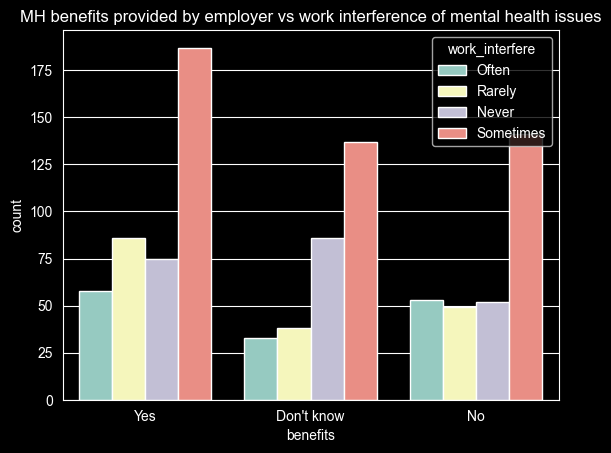

In [28]:
sns.countplot(x="benefits", hue="work_interfere", data=df)
plt.title("MH benefits provided by employer vs work interference of mental health issues")
plt.show()


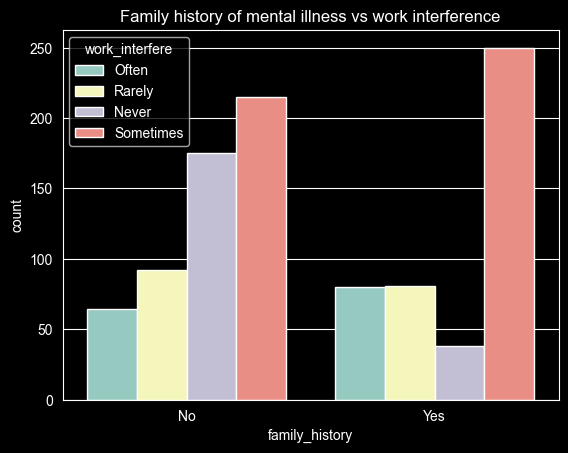

In [29]:
sns.countplot(x="family_history", hue="work_interfere", data=df)
plt.title("Family history of mental illness vs work interference")
plt.show()


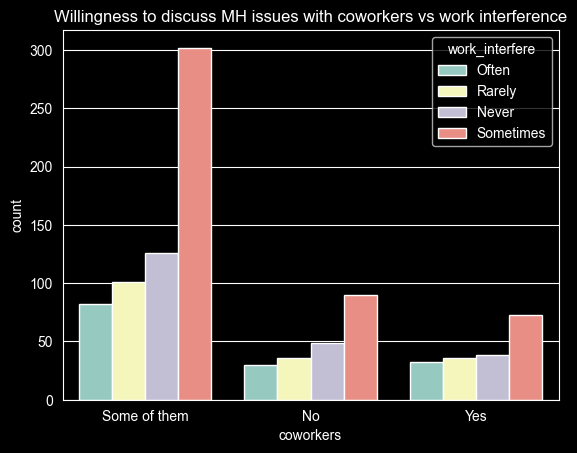

In [30]:
sns.countplot(x="coworkers", hue="work_interfere", data=df)
plt.title("Willingness to discuss MH issues with coworkers vs work interference")
plt.show()


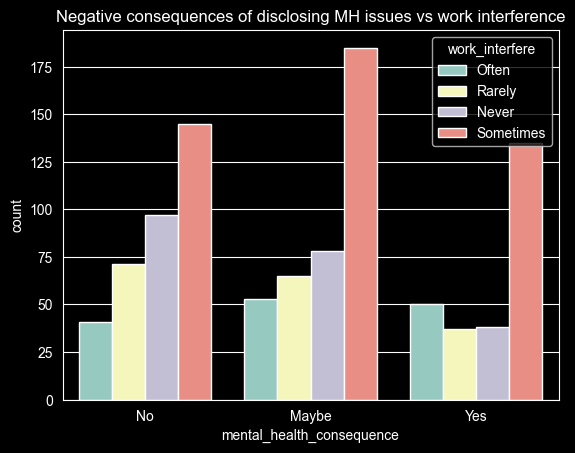

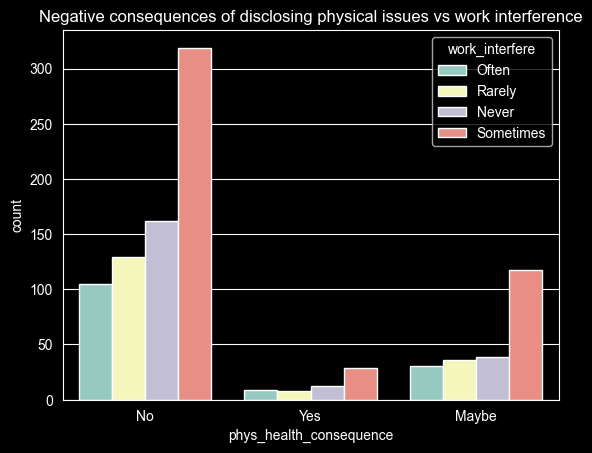

In [31]:
sns.countplot(x="mental_health_consequence", hue="work_interfere", data=df)
plt.title("Negative consequences of disclosing MH issues vs work interference")
plt.show()

sns.countplot(x="phys_health_consequence", hue="work_interfere", data=df)
plt.title("Negative consequences of disclosing physical issues vs work interference")
plt.show()



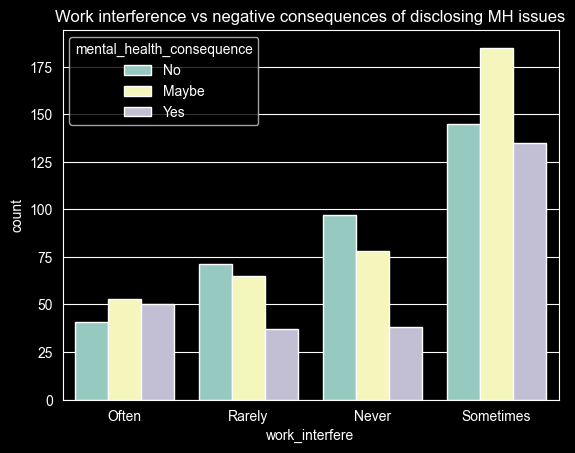

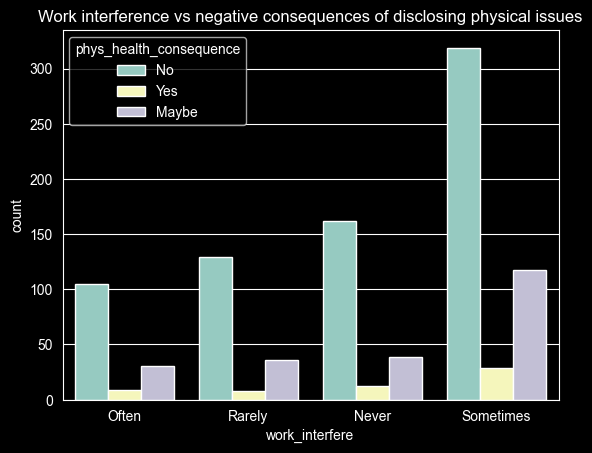

In [32]:
sns.countplot(x="work_interfere", hue="mental_health_consequence", data=df)
plt.title("Work interference vs negative consequences of disclosing MH issues")
plt.show()


sns.countplot(x="work_interfere", hue="phys_health_consequence", data=df)
plt.title("Work interference vs negative consequences of disclosing physical issues")
plt.show()

In [33]:
# Initial preprocessing decisions (considering "treatment" and "work_interfere" as key outcomes)
# BN version
RAW_PATH = "../data/raw/mental_health_tech.csv"
OUT_CLEAN = "../data/processed/mental_health_tech_clean.csv"     # for BN (keeps NaNs)

# Columns irrelevant for prediction
DROP_COLS = ["index", "comments", "Timestamp"]

# Yes/No normalization
YES_SET = {"yes", "y", "true", "1"}
NO_SET  = {"no", "n", "false", "0"}

# Ordinal order for work_interfere
WORK_INTERFERE_ORDER = ["Never", "Rarely", "Sometimes", "Often"]
NO_EMPLOYEES_ORDER = [
    "1-5",
    "6-25",
    "26-100",
    "100-500",
    "500-1000",
    "More than 1000",
]
LEAVE_ORDER = ["Very difficult", "Somewhat difficult", "Somewhat easy", "Very easy", "Don't know"]

# Yes/No/Don't Know columns
YN_DK_COLS = ["benefits", "wellness_program", "seek_help", "anonymity", "mental_vs_physical"]
# Yes/No/Maybe columns
YNM_COLS = [ "mental_health_consequence", "phys_health_consequence", "mental_health_interview", "phys_health_interview"]
# Binary columns to convert to 0/1
binary_cols = ["self_employed", "family_history", "treatment", "remote_work", "tech_company", "obs_consequence"]
# Yes/No/Some columns
YNSOME_COLS = ["coworkers", "supervisor"]

# Preprocessing functions
# -----------------------
# Lowercase + strip for object columns, keeps NaNs
def normalize_str(s: pd.Series) -> pd.Series:
    return s.astype("string").str.strip()

# Map yes/no to 1/0, returns NaN for unknown
def to_binary_yes_no(s: pd.Series) -> pd.Series:
    if s is None:
        return s
    x = normalize_str(s).str.lower()
    return x.map(lambda v: 1 if v in YES_SET else (0 if v in NO_SET else np.nan))

# Converts age to numeric, sets implausible values to NaN
def clean_age(age: pd.Series, min_age: int = 15, max_age: int = 100) -> pd.Series:
    a = pd.to_numeric(age, errors="coerce")
    a = a.where((a >= min_age) & (a <= max_age), np.nan)
    return a

# Normalization functions for specific columns
def normalize_leave(s: pd.Series) -> pd.Series:
    x = s.astype("string").str.strip().str.lower()
    x = x.replace({"": pd.NA, "nan": pd.NA, "na": pd.NA})

    mapping = {
        "very difficult": "Very difficult",
        "somewhat difficult": "Somewhat difficult",
        "somewhat easy": "Somewhat easy",
        "very easy": "Very easy",
        "don't know": "Don't know",
        "dont know": "Don't know",
        "not sure": "Don't know",
    }
    return x.map(mapping)

def normalize_yes_no_maybe(s: pd.Series) -> pd.Series:
    x = s.astype("string").str.strip().str.lower()
    x = x.replace({"": pd.NA, "nan": pd.NA, "na": pd.NA})

    mapping = {
        "yes": "Yes",
        "no": "No",
        "maybe": "Maybe",
        "not sure": "Maybe",
    }
    return x.map(mapping)

def normalize_yes_no_some(s: pd.Series) -> pd.Series:
    x = s.astype("string").str.strip().str.lower()
    x = x.replace({"": pd.NA, "nan": pd.NA, "na": pd.NA})

    mapping = {
        "yes": "Yes",
        "no": "No",
        "some of them": "Some of them",
        "some": "Some of them",
    }
    return x.map(mapping)

def normalize_yes_no_notsure(s: pd.Series) -> pd.Series:
    x = s.astype("string").str.strip().str.lower()
    x = x.replace({"": pd.NA, "nan": pd.NA, "na": pd.NA})

    mapping = {
        "yes": "Yes",
        "no": "No",
        "not sure": "Not sure",
        "not sure ": "Not sure",
        "don't know": "Not sure",
        "dont know": "Not sure",
        "do not know": "Not sure",
    }
    return x.map(mapping)

def normalize_yes_no_dk(s: pd.Series) -> pd.Series:
    x = s.astype("string").str.strip().str.lower()
    x = x.replace({"": pd.NA, "nan": pd.NA, "na": pd.NA})

    mapping = {
        "yes": "Yes",
        "no": "No",
        "don't know": "Don't know",
        "dont know": "Don't know",
        "do not know": "Don't know",
        "unknown": "Don't know",
        "not sure": "Don't know",
    }
    return x.map(mapping)

# Load
df = pd.read_csv(RAW_PATH)

# Standardize column names
df.columns = [c.strip() for c in df.columns]

# Drop unnecessary columns
df = df.drop(columns=[c for c in DROP_COLS if c in df.columns], errors="ignore")

# Clean specific columns
if "Age" in df.columns:
    df["Age"] = clean_age(df["Age"])
elif "age" in df.columns:
    df["age"] = clean_age(df["age"])

for col in df.select_dtypes(include=["object"]).columns:
    df[col] = normalize_str(df[col])

if "Gender" in df.columns:
    g = df["Gender"].astype("string").str.strip().str.lower()
    gender_map = {"male": "male", "m": "male", "female": "female", "f": "female"}
    df["Gender"] = g.map(gender_map)

if "care_options" in df.columns:
    df["care_options"] = normalize_yes_no_notsure(df["care_options"])

if "leave" in df.columns:
    df["leave"] = normalize_leave(df["leave"])
    df["leave"] = pd.Categorical(df["leave"], categories=LEAVE_ORDER, ordered=True)

if "no_employees" in df.columns:
    ne = df["no_employees"].astype("string").str.strip().str.lower()

    # Map common variants to a single label set
    ne_map = {
        "1-5": "1-5",
        "6-25": "6-25",
        "26-100": "26-100",
        "100-500": "100-500",
        "500-1000": "500-1000",
        "more than 1000": "More than 1000",
        "more than 1,000": "More than 1000",
        ">1000": "More than 1000",
        "1000+": "More than 1000",
    }

    df["no_employees"] = ne.map(ne_map)

    df["no_employees"] = pd.Categorical(
        df["no_employees"],
        categories=NO_EMPLOYEES_ORDER,
        ordered=True
    )

for col in YNSOME_COLS:
    if col in df.columns:
        df[col] = normalize_yes_no_some(df[col])

for col in YNM_COLS:
    if col in df.columns:
        df[col] = normalize_yes_no_maybe(df[col])

for col in YN_DK_COLS:
    if col in df.columns:
        df[col] = normalize_yes_no_dk(df[col])

for col in binary_cols:
    if col in df.columns:
        df[col] = to_binary_yes_no(df[col])

for col in ["Country", "state"]:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype("string")
            .str.strip()
            .replace({"": pd.NA, "nan": pd.NA, "na": pd.NA})
        )

if "work_interfere" in df.columns:
    df["work_interfere"] = df["work_interfere"].astype("string").str.strip()
    df["work_interfere"] = df["work_interfere"].str.lower().str.capitalize()

    df["work_interfere"] = pd.Categorical(
        df["work_interfere"],
        categories=WORK_INTERFERE_ORDER,
        ordered=True
    )

# BN dataset
df_bn = df.copy()

df_bn.to_csv(OUT_CLEAN, index=False)

df_bn.head()

C:\Users\Diana\AppData\Local\Temp\ipykernel_30164\3195759224.py:136: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  for col in df.select_dtypes(include=["object"]).columns:


,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37.0,female,United States,IL,NaN,0,1,Often,6-25,0,1,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,0
1,44.0,male,United States,IN,NaN,0,0,Rarely,More than 1000,0,0,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,0
2,32.0,male,Canada,<NA>,NaN,0,0,Rarely,6-25,0,1,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,0
3,31.0,male,United Kingdom,<NA>,NaN,1,1,Often,26-100,0,1,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,1
4,31.0,male,United States,TX,NaN,0,0,Never,100-500,1,1,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,0


In [34]:
# ML version (imputation + encoding)

OUT_ML = "../data/processed/mental_health_tech_ml.csv"

def mode_impute(series: pd.Series) -> pd.Series:
    if series.dropna().empty:
        return series
    return series.fillna(series.mode(dropna=True).iloc[0])

def median_impute(series: pd.Series) -> pd.Series:
    return series.fillna(series.median())


df_ml = df_bn.copy()

# Ensure categorical values are consistent for ML encoding
for col in df_ml.columns:
    if str(df_ml[col].dtype) == "category":
        df_ml[col] = df_ml[col].astype("string")

# Missingness indicators
missing_indicators = []
for col in df_ml.columns:
    if df_ml[col].isna().any():
        ind_col = f"{col}__missing"
        df_ml[ind_col] = df_ml[col].isna().astype(int)
        missing_indicators.append(ind_col)

# Impute numeric columns
num_cols = df_ml.select_dtypes(include=["number"]).columns
for col in num_cols:
    df_ml[col] = median_impute(df_ml[col])

# Impute categorical columns
cat_cols = [c for c in df_ml.columns if c not in num_cols and c not in missing_indicators]
for col in cat_cols:
    df_ml[col] = mode_impute(df_ml[col])

# One-hot encoding
df_ml = pd.get_dummies(df_ml, columns=cat_cols, drop_first=True)

df_ml.to_csv(OUT_ML, index=False)

df_ml.head()


,Age,self_employed,family_history,treatment,remote_work,tech_company,obs_consequence,Age__missing,Gender__missing,state__missing,self_employed__missing,work_interfere__missing,Gender_male,Country_Austria,"Country_Bahamas, The",Country_Belgium,Country_Bosnia and Herzegovina,Country_Brazil,Country_Bulgaria,Country_Canada,Country_China,Country_Colombia,Country_Costa Rica,Country_Croatia,Country_Czech Republic,Country_Denmark,Country_Finland,Country_France,Country_Georgia,Country_Germany,Country_Greece,Country_Hungary,Country_India,Country_Ireland,Country_Israel,Country_Italy,Country_Japan,Country_Latvia,Country_Mexico,Country_Moldova,Country_Netherlands,Country_New Zealand,Country_Nigeria,Country_Norway,Country_Philippines,Country_Poland,Country_Portugal,Country_Romania,Country_Russia,Country_Singapore,Country_Slovenia,Country_South Africa,Country_Spain,Country_Sweden,Country_Switzerland,Country_Thailand,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Zimbabwe,state_AZ,state_CA,state_CO,state_CT,state_DC,state_FL,state_GA,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_NC,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,no_employees_100-500,no_employees_26-100,no_employees_500-1000,no_employees_6-25,no_employees_More than 1000,benefits_No,benefits_Yes,care_options_Not sure,care_options_Yes,wellness_program_No,wellness_program_Yes,seek_help_No,seek_help_Yes,anonymity_No,anonymity_Yes,leave_Somewhat difficult,leave_Somewhat easy,leave_Very difficult,leave_Very easy,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_No,phys_health_consequence_Yes,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes
0,37.0,0.0,0,1,0,1,0,0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,True,False,True,False,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False,True,True,False,False,False,False,True
1,44.0,0.0,0,0,0,0,0,0,0,0,1,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False
2,32.0,0.0,0,0,0,1,0,0,0,1,1,0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal